In [2]:
import pandas as pd

output = pd.read_csv("../output/output_original-20240218-165024.csv")

Plotting the distribution of the scores

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-5.87764015e+01, -5.28988081e+01, -4.70212146e+01, -4.11436212e+01,
        -3.52660277e+01, -2.93884343e+01, -2.35108408e+01, -1.76332474e+01,
        -1.17556539e+01, -5.87806046e+00, -4.67008562e-04]),
 <BarContainer object of 10 artists>)

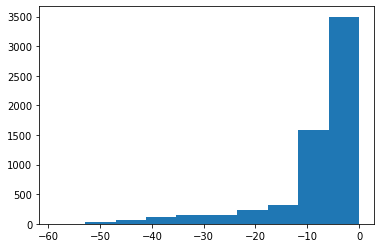

In [2]:
import matplotlib.pyplot as plt
scores = output["score"]
plt.hist(scores)

In [3]:
import numpy as np
print(np.mean(scores))
print(np.sqrt(np.var(scores)))

-8.047089387706293
9.3508169108883


(Something like a gamma distribution, or similar?)

(array([ 3.,  1.,  4.,  0., 19.,  4., 29., 14., 45., 29.]),
 array([0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
        0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
        1.        ]),
 <BarContainer object of 10 artists>)

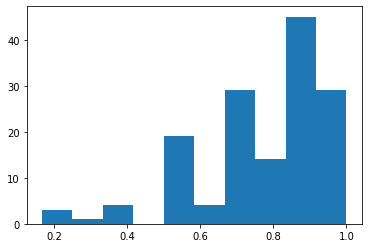

In [4]:
output_aucs = pd.read_csv("../output/output_original_auc-20240218-165024.csv")

aucs = output_aucs["auc"]
plt.hist(aucs)

In [5]:
print(np.mean(aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(aucs))
print(len(aucs))

0.7530839178692024
0.8333333333333333
148


In [7]:
aucs

0      0.953109
1      0.877135
2      0.800634
3      0.907100
4      0.541667
         ...   
143    0.666667
144    1.000000
145    1.000000
146    0.833333
147    0.833333
Name: auc, Length: 148, dtype: float64

In [6]:
trimmed_output_aucs = output_aucs.loc[output_aucs['auc'] != 1].loc[output_aucs['auc'] != 0]
trimmed_aucs = trimmed_output_aucs['auc']

We're removing situations where you only have one TCR you're checking against (which are the majority of the cases where AUC $\in \{0,1\}$)

In [8]:
print(np.mean(trimmed_aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(trimmed_aucs))
print(len(trimmed_aucs))

0.7028977223141621
0.75
123


In [9]:
binders = output[" binder"]

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(binders, scores)

0.7438107851937948

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

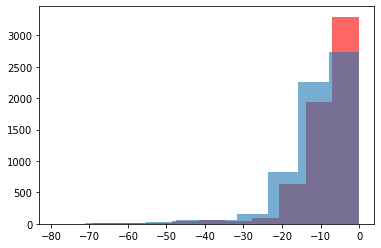

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
mis_output = pd.read_csv("../output/output-20240208-213247_MIS.csv")
mis_scores = mis_output["score"]
plt.hist(mis_scores, color="red", alpha=0.6)
plt.hist(scores, alpha=0.6)

In [4]:
data = pd.read_csv("../data/input_original.csv")

In [19]:
import numpy as np
peptides = data["peptide"].unique()

with(open("peptides.txt", "w") as file):
    for peptide in peptides:
        file.write(peptide + "\n")

In [ ]:
TCRs = data["CDR3b"].unique()

with(open("TCRs.txt", "w") as file):
    for TCR in TCRs:
        file.write(TCR + "\n")

(array([   7.,   31.,   99.,  428., 1816., 2732.,  835.,  138.,   40.,
          20.]),
 array([-10.7442131 ,  -8.74170794,  -6.73920279,  -4.73669763,
         -2.73419247,  -0.73168731,   1.27081785,   3.27332301,
          5.27582817,   7.27833333,   9.28083849]),
 <BarContainer object of 10 artists>)

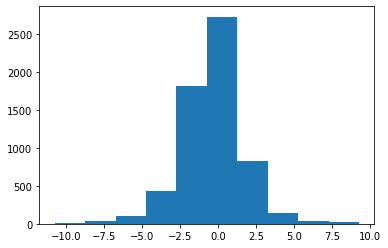

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

output = pd.read_csv("../output/output_original-20240317-114017.csv")

mi_scores_a = output["mi_scores_a"]
mi_scores_b = output["mi_scores_b"]
plt.hist(mi_scores_a)

(array([2.000e+00, 3.000e+00, 7.000e+00, 5.400e+01, 3.620e+02, 2.437e+03,
        2.691e+03, 4.420e+02, 1.250e+02, 2.300e+01]),
 array([-17.66898727, -14.8139689 , -11.95895052,  -9.10393214,
         -6.24891376,  -3.39389539,  -0.53887701,   2.31614137,
          5.17115974,   8.02617812,  10.8811965 ]),
 <BarContainer object of 10 artists>)

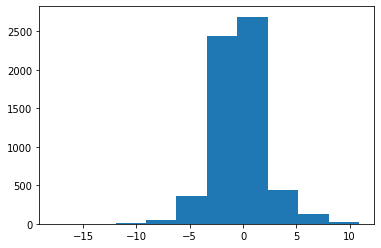

In [2]:
plt.hist(mi_scores_b)

(array([6.127e+03, 9.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([2.12058813e-08, 5.31671763e+03, 1.06334353e+04, 1.59501529e+04,
        2.12668705e+04, 2.65835882e+04, 3.19003058e+04, 3.72170234e+04,
        4.25337411e+04, 4.78504587e+04, 5.31671763e+04]),
 <BarContainer object of 10 artists>)

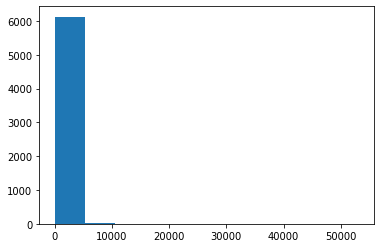

In [14]:
import numpy as np

const = 1

probs = const * np.exp(mi_scores_b)

under_1 = [score for score in probs if score <= 1]
over_1 = [score for score in probs if score > 1]
over_10 = [score for score in probs if score > 10]
over_100 = [score for score in probs if score > 100]



plt.hist(const * np.exp(mi_scores_b))

(array([896., 616., 564., 345., 229., 247., 240., 220., 201., 182.]),
 array([2.12058813e-08, 9.99632140e-02, 1.99926407e-01, 2.99889600e-01,
        3.99852793e-01, 4.99815985e-01, 5.99779178e-01, 6.99742371e-01,
        7.99705564e-01, 8.99668757e-01, 9.99631949e-01]),
 <BarContainer object of 10 artists>)

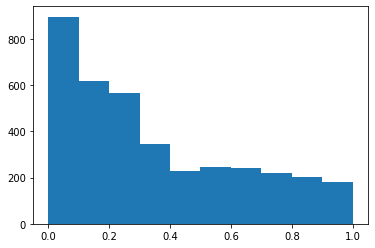

In [10]:
plt.hist(under_1)


(array([2.387e+03, 9.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00097799e+00, 5.31761851e+03, 1.06342361e+04, 1.59508536e+04,
        2.12674711e+04, 2.65840887e+04, 3.19007062e+04, 3.72173237e+04,
        4.25339413e+04, 4.78505588e+04, 5.31671763e+04]),
 <BarContainer object of 10 artists>)

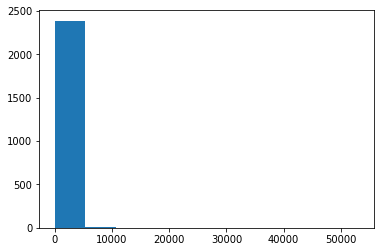

In [11]:
plt.hist(over_1)

(array([577.,   9.,   3.,   1.,   1.,   1.,   1.,   2.,   0.,   1.]),
 array([1.00621673e+01, 5.32577358e+03, 1.06414850e+04, 1.59571964e+04,
        2.12729078e+04, 2.65886193e+04, 3.19043307e+04, 3.72200421e+04,
        4.25357535e+04, 4.78514649e+04, 5.31671763e+04]),
 <BarContainer object of 10 artists>)

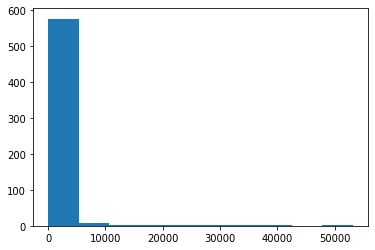

In [13]:
plt.hist(over_10)

(array([182.,   9.,   3.,   1.,   1.,   1.,   2.,   1.,   0.,   1.]),
 array([  100.36784591,  5407.04869556, 10713.72954521, 16020.41039486,
        21327.09124451, 26633.77209416, 31940.45294382, 37247.13379347,
        42553.81464312, 47860.49549277, 53167.17634242]),
 <BarContainer object of 10 artists>)

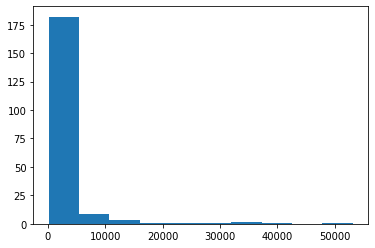

In [15]:
plt.hist(over_100)

In [16]:
max(over_100)

53167.176342423525

(array([6.127e+03, 9.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([3.98852878e-13, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

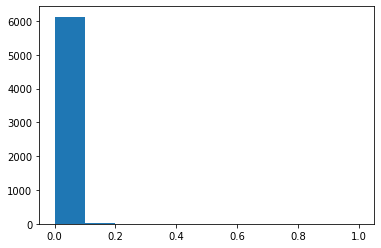

In [18]:
import numpy as np

const = 1 / max(probs)

adjusted_probs = const * np.exp(mi_scores_b)

plt.hist(adjusted_probs)


(array([62.,  9.,  3.,  1.,  1.,  1.,  2.,  1.,  0.,  1.]),
 array([0.01003081, 0.10902773, 0.20802465, 0.30702157, 0.40601848,
        0.5050154 , 0.60401232, 0.70300924, 0.80200616, 0.90100308,
        1.        ]),
 <BarContainer object of 10 artists>)

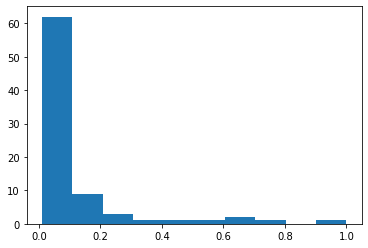

In [22]:
def get_probs_over_k(probs, k):
    return [prob for prob in probs if prob > k]

plt.hist(get_probs_over_k(adjusted_probs, 0.01))


(array([9., 3., 1., 1., 1., 1., 1., 1., 0., 1.]),
 array([0.1129597 , 0.20166373, 0.29036776, 0.37907179, 0.46777582,
        0.55647985, 0.64518388, 0.73388791, 0.82259194, 0.91129597,
        1.        ]),
 <BarContainer object of 10 artists>)

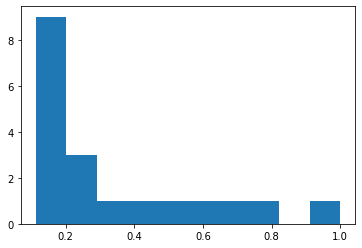

In [23]:
plt.hist(get_probs_over_k(adjusted_probs, 0.1))

(array([3., 1., 1., 1., 1., 0., 2., 0., 0., 1.]),
 array([0.24733366, 0.32260029, 0.39786693, 0.47313356, 0.5484002 ,
        0.62366683, 0.69893346, 0.7742001 , 0.84946673, 0.92473337,
        1.        ]),
 <BarContainer object of 10 artists>)

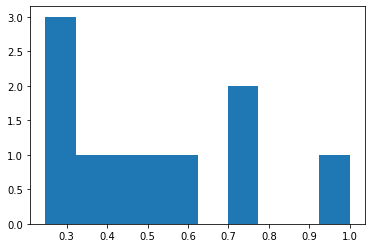

In [24]:
plt.hist(get_probs_over_k(adjusted_probs, 0.2))

(array([ 11.,  99., 301., 784., 731., 120.,  80.,  89.,  51.,   9.]),
 array([-6.88866043, -5.29490995, -3.70115948, -2.107409  , -0.51365852,
         1.08009195,  2.67384243,  4.26759291,  5.86134338,  7.45509386,
         9.04884434]),
 <BarContainer object of 10 artists>)

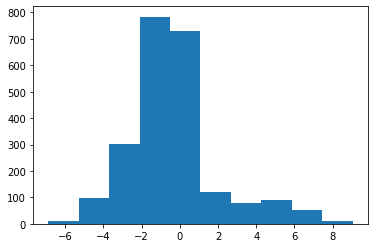

In [31]:
GILGFVFTL_mi_scores = output.loc[output["peptide"] == "GILGFVFTL"]["mi_scores_b"]
plt.hist(GILGFVFTL_mi_scores)

8508.699055724011


(array([114.,  16.,   5.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.0100879 , 0.10907911, 0.20807032, 0.30706153, 0.40605274,
        0.50504395, 0.60403516, 0.70302637, 0.80201758, 0.90100879,
        1.        ]),
 <BarContainer object of 10 artists>)

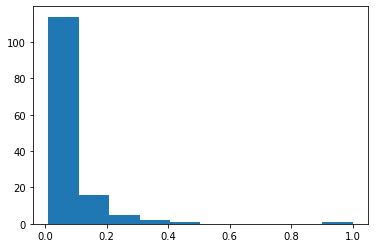

In [37]:
def get_normalised_probs_from_epitope(peptide):
    mi_scores = output.loc[output["peptide"] == peptide]["mi_scores_b"]
    probs = np.exp(mi_scores)
    print(max(probs))
    probs = probs / max(probs)
    return probs

GILGFVFTL_normalised = get_normalised_probs_from_epitope("GILGFVFTL")
plt.hist(get_probs_over_k(GILGFVFTL_normalised, 0.01))

37227.78950268781


(array([503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.92686625e-08, 1.00000017e-01, 2.00000015e-01, 3.00000013e-01,
        4.00000012e-01, 5.00000010e-01, 6.00000008e-01, 7.00000006e-01,
        8.00000004e-01, 9.00000002e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

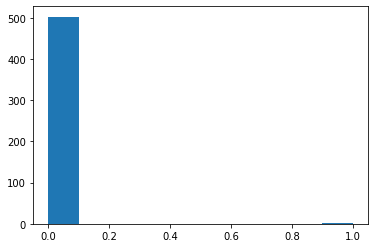

In [44]:
NLV_normalised = get_normalised_probs_from_epitope("NLVPMVATV")
plt.hist(NLV_normalised)

In [46]:
get_probs_over_k(NLV_normalised, 0.1)

[1.0]

So indeed, the constants we'd need to divide by to get into the range $[0,1]$ differs based on the epitope (but we could also take a sensible upper bound?)

(array([5268.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         878.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

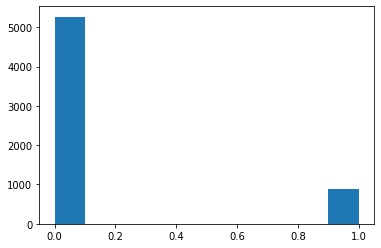

In [3]:
plt.hist(output["binder"])